In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

네이버에서 특정 기업의 일별 주가 데이터 가져오기

In [2]:
# KT
code = '030200'
url_tmpl = 'http://finance.naver.com/item/sise_day.nhn?code=%s&page=%d'
npages = 480

In [3]:
df_base = pd.DataFrame({
    'code':[code],
    'date':['2018-08-01'],
    'close':[0],
    'change':[0],
    'open':[0],
    'high':[0],
    'low':[0],
    'volume':[0]
}, columns=['date', 'close', 'change', 'open', 'high', 'low', 'volume'])
print(df_base)

         date  close  change  open  high  low  volume
0  2018-08-01      0       0     0     0    0       0


In [4]:
for p in range(npages, 0, -1):
    url = url_tmpl % (code, p)
    dfs = pd.read_html(url)
    df_price = dfs[0]
    df_price = df_price.dropna()
    df_price.columns = ['date', 'close', 'change', 'open', 'high', 'low', 'volume']
    df_price = df_price[1:]
    df_price = df_price.replace('\.', '-', regex=True)
    # df_price['date'] = pd.to_datetime(df_price['date'])
    int_cols = ['close', 'change', 'open', 'high', 'low', 'volume']
    df_price[int_cols] = df_price[int_cols].astype('int', errors='ignore')
    df_price['code'] = code

    df_base = pd.concat([df_base, df_price])

    if p % 100 == 0:
        print('%d,' % p)
        
print("Done")

400,
300,
200,
100,
Done


In [5]:
df = df_base.sort_values(by='date')
df = df[df.close != 0]
df.to_csv("data/stock_price.csv", index=False)

print(df)
print(df.shape)

    change  close    code        date   high    low   open   volume
14    1200  37000  030200  1999-01-25  38200  36900  38100   396310
13    1000  36000  030200  1999-01-26  38200  36000  37300   331550
12    1700  37700  030200  1999-01-27  37700  36000  36200   337720
11    1200  38900  030200  1999-01-28  39400  37700  37700   403900
10      50  38850  030200  1999-01-29  39200  38300  38800   284270
6     1150  40000  030200  1999-02-01  41500  39000  39000   534900
5      550  39450  030200  1999-02-02  40000  39000  40000   244160
4      550  38900  030200  1999-02-03  39200  38500  39200   219700
3      200  38700  030200  1999-02-04  38750  37950  37950   132180
2       50  38750  030200  1999-02-05  39400  38200  38700   128550
14     200  38950  030200  1999-02-08  39500  38800  39400   208020
13     250  38700  030200  1999-02-09  38750  37900  38750   246540
12     600  38100  030200  1999-02-10  38500  37300  38300   230030
11       0  38100  030200  1999-02-11  38600  37

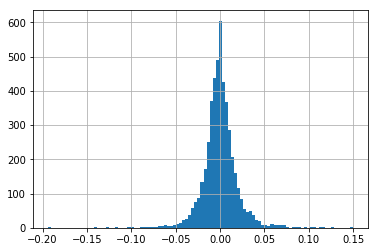

In [6]:
vclose = df['close']
daily_returns = (vclose/vclose.shift(1)) - 1
daily_returns.hist(bins=100)